Model


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
from make_dataloader import *
import pickle
try:
    loaders = pickle.load(open("./fer2013/fer2013Loaders.p","rb"))
except (OSError, IOError) as e:
    make_dataloader(only_two = True)
    loaders = pickle.load(open("./fer2013/fer2013Loaders.p","rb"))

In [67]:
train_loader = loaders['train_loader']
valid_loader = loaders['valid_loader']

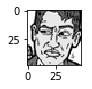

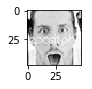

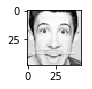

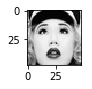

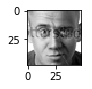

In [68]:
a = 0
for img,j in train_loader:
    plt.figure(figsize = (10,1))
    plt.imshow(img[0].numpy()[0], cmap="Greys_r")
    plt.show()
    a+=1
    if a >4:
        break

In [69]:
import emoCNN
import emoSolver
model = emoCNN.emoCNNnet(kernels = [12,6])
solver = emoSolver.emoSolver(optim_args={"lr": 0.001})

<bound method emoCNNnet.parameters of emoCNNnet (
  (feature): Sequential (
    (0): Conv2d(1, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU ()
    (2): Conv2d(12, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (3): ReLU ()
    (4): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (5): Conv2d(12, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (6): ReLU ()
    (7): Conv2d(6, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (8): ReLU ()
    (9): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (classifier): Sequential (
    (0): Linear (864 -> 100)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU ()
    (3): Linear (100 -> 2)
  )
)>


In [70]:
print(model.parameters)
from torch.autograd import Variable
for i, j in train_loader:
    print(i.size(),j.size())
    #print(i)
    print(model(Variable(i)).size())
    break


<bound method emoCNNnet.parameters of emoCNNnet (
  (feature): Sequential (
    (0): Conv2d(1, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): ReLU ()
    (2): Conv2d(12, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (3): ReLU ()
    (4): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
    (5): Conv2d(12, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (6): ReLU ()
    (7): Conv2d(6, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (8): ReLU ()
    (9): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  )
  (classifier): Sequential (
    (0): Linear (864 -> 100)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True)
    (2): ReLU ()
    (3): Linear (100 -> 2)
  )
)>
(torch.Size([64, 1, 48, 48]), torch.Size([64]))
torch.Size([64, 2])


In [73]:
solver.train(model, train_loader, valid_loader, log_nth=100, num_epochs=1)

START TRAIN.
[iteration 0/56] TRAIN loss : 0.647244


error: [Errno 111] Connection refused

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(2, 1, 1)
plt.plot(solver.train_loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()